In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'student-scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
import matplotlib.pyplot as plt
from scipy import stats

<Axes: title={'center': 'Scatter Plot of Hours vs Scores'}, xlabel='Hours', ylabel='Scores'>

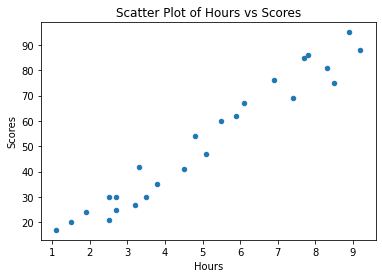

In [7]:
df.plot.scatter(x='Hours', y='Scores', title='Scatter Plot of Hours vs Scores')

In [8]:
slope, intercept, r, p, std_err = stats.linregress(df)

x = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)   # . values to extract values and .reshaoe to convert values in columns as 2d array

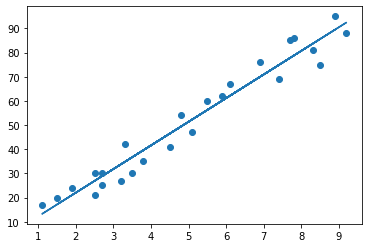

In [9]:
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =42)

In [12]:
x_train

array([[3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [13]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3],
       [5.1]])

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(x_train, y_train)

LinearRegression()

In [17]:
reg.intercept_

array([2.79419668])

In [18]:
reg.coef_

array([[9.71054094]])

In [19]:
def calc(slope, intercept, hour):
    return slope*hour + intercept

In [20]:
score = calc(reg.coef_, reg.intercept_, 9.2)

In [21]:
score

array([[92.13117329]])

In [22]:
pred = reg.predict(x_test)

In [23]:
pred

array([[83.39168645],
       [27.07054902],
       [27.07054902],
       [69.79692914],
       [60.0863882 ],
       [29.0126572 ],
       [34.83898177],
       [52.31795545]])

In [24]:
df_pred = pd.DataFrame({'Hours':x_test.squeeze(),'Actual':y_test.squeeze(),'Predicted':pred.squeeze()})

In [25]:
df_pred

,Hours,Actual,Predicted
0,8.3,81,83.391686
1,2.5,30,27.070549
2,2.5,21,27.070549
3,6.9,76,69.796929
4,5.9,62,60.086388
5,2.7,25,29.012657
6,3.3,42,34.838982
7,5.1,47,52.317955


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mae= mean_absolute_error(y_test, pred)

In [28]:
mae

4.499999999999998

In [29]:
mse= mean_squared_error(y_test, pred)

In [30]:
mse

23.61945761415174

In [31]:
rmse = np.sqrt(mse)

In [32]:
rmse

4.859985351228103

In [33]:
new_df = pd.read_csv(r'Advertising1.csv')
new_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
new_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### EDA 

### 1. Correlation coefficient

In [36]:
new_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [37]:
new_df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### 2(a). Matplotlib scatter diagrams

In [38]:
import matplotlib.pyplot as plt

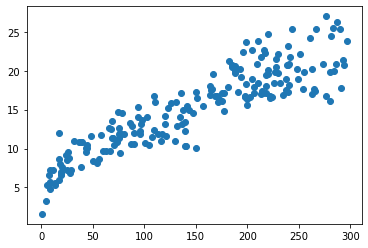

In [39]:
Tv = new_df['TV'].values.reshape(-1,1)
Sales = new_df['Sales'].values.reshape(-1,1)
plt.scatter(Tv, Sales)                    #it shows direct linear relation between sales and TV

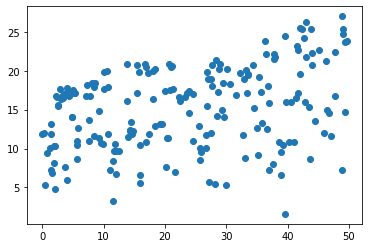

In [40]:
Radio = new_df['Radio'].values.reshape(-1,1)
Sales = new_df['Sales'].values.reshape(-1,1)
plt.scatter(Radio, Sales)                   #it shows scatter relation between sales and Radio

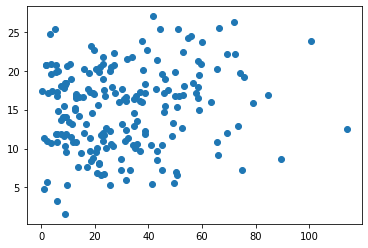

In [41]:
Newspaper = new_df['Newspaper'].values.reshape(-1,1)
Sales = new_df['Sales'].values.reshape(-1,1)
plt.scatter(Newspaper, Sales)                 #it shows more scatter relation between sales and Newspaper

### 2(b). Seaborn Pairplot diagrams

In [42]:
import seaborn as sns

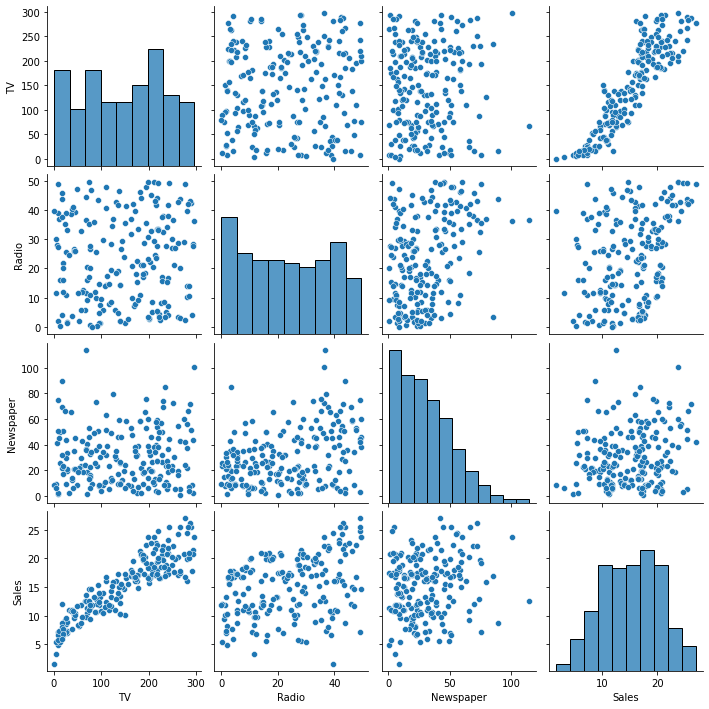

In [43]:
sns.pairplot(new_df)

### 2(c) Matplotlib Histogram diagram

(array([ 8., 11.,  7.,  5.,  5.,  5.,  7., 10.,  5.,  7.,  6.,  4.,  6.,
         9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140.]),
 <BarContainer object of 14 artists>)

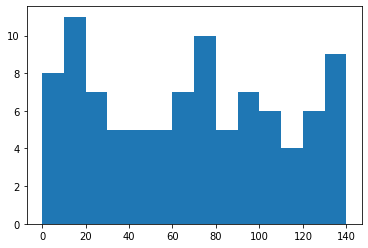

In [44]:
Tv = new_df['TV'].values.reshape(-1,1)
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
plt.hist(Tv , bins)

(array([50., 38., 42., 35., 35.,  0.,  0.,  0.]),
 array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <BarContainer object of 8 artists>)

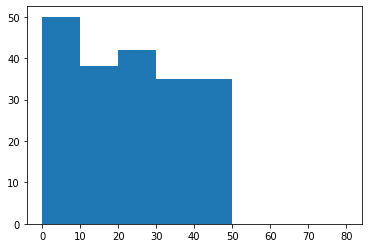

In [45]:
Radio = new_df['Radio'].values.reshape(-1,1)
bins = [0,10,20,30,40,50,60,70,80]
plt.hist(Radio , bins)

(array([42., 33., 35., 31., 21., 19.,  8.,  7.,  2.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

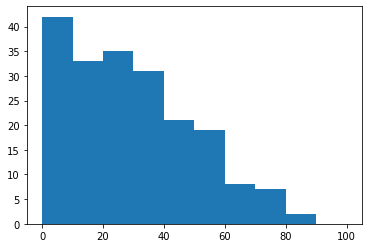

In [46]:
Newspaper = new_df['Newspaper'].values.reshape(-1,1)
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(Newspaper , bins)

(array([ 34., 126.,  40.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <BarContainer object of 8 artists>)

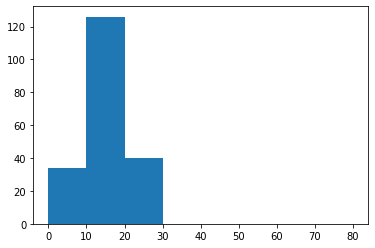

In [47]:
Sales = new_df['Sales'].values.reshape(-1,1)
bins = [0,10,20,30,40,50,60,70,80]
plt.hist(Sales, bins)

### Application of Simple linear regression model

In [48]:
x1 = new_df['TV'].values.reshape(-1,1)
y1 = new_df['Sales'].values.reshape(-1,1)   # . values to extract values and .reshaoe to convert values in columns as 2d array

In [49]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3, random_state =42)

In [50]:
regression = LinearRegression()

In [51]:
regression.fit(x1_train, y1_train)

LinearRegression()

In [52]:
regression.intercept_

array([7.20655455])

In [53]:
regression.coef_

array([[0.05483488]])

In [54]:
prediction1 = regression.predict(x1_test)

In [55]:
# importing r2_score module
from sklearn.metrics import r2_score
# predicting the accuracy score
score=r2_score(y1_test,prediction1)
print('mean_sqrd_error is==',mean_squared_error(y1_test,prediction1))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y1_test,prediction1)))
print('r2_score is ',score)

mean_sqrd_error is== 5.179525402166653
root_mean_squared error of is== 2.2758570698017597
r2_score is  0.814855389208679


In [56]:
x2 = new_df['Radio'].values.reshape(-1,1)
y2 = new_df['Sales'].values.reshape(-1,1)   # . values to extract values and .reshaoe to convert values in columns as 2d array

In [57]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3, random_state =42)

In [58]:
regression = LinearRegression()

In [59]:
regression.fit(x2_train, y2_train)

LinearRegression()

In [60]:
prediction2 = regression.predict(x2_test)

In [61]:
# importing r2_score module
from sklearn.metrics import r2_score
# predicting the accuracy score
score=r2_score(y2_test,prediction2)
print('mean_sqrd_error is==',mean_squared_error(y2_test,prediction2))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y2_test,prediction2)))
print('r2_score is ',score)

mean_sqrd_error is== 29.216054819275303
root_mean_squared error of is== 5.405187769104354
r2_score is  -0.044341841843250185


### Application of Multiple linear regression model

In [107]:
X = new_df[['TV', 'Radio']].values
Y = new_df['Sales'].values.reshape(-1,1)

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state =42)

In [109]:
X_train

array([[284.3,  10.6],
       [184.9,  21. ],
       [112.9,  17.4],
       [ 23.8,  35.1],
       [290.7,   4.1],
       [ 19.4,  16. ],
       [293.6,  27.7],
       [ 18.7,  12.1],
       [134.3,   4.9],
       [ 25.6,  39. ],
       [100.4,   9.6],
       [ 80.2,   0. ],
       [188.4,  18.1],
       [177. ,  33.4],
       [125.7,  36.9],
       [209.6,  20.6],
       [142.9,  29.3],
       [184.9,  43.9],
       [222.4,   4.3],
       [241.7,  38. ],
       [ 17.2,  45.9],
       [120.5,  28.5],
       [ 89.7,   9.9],
       [191.1,  28.7],
       [ 75.5,  10.8],
       [193.2,  18.4],
       [ 85.7,  35.8],
       [266.9,  43.8],
       [ 39.5,  41.1],
       [261.3,  42.7],
       [ 13.2,  15.9],
       [193.7,  35.4],
       [296.4,  36.3],
       [265.6,  20. ],
       [214.7,  24. ],
       [149.7,  35.6],
       [131.7,  18.4],
       [ 57.5,  32.8],
       [240.1,  16.7],
       [141.3,  26.8],
       [180.8,  10.8],
       [ 97.2,   1.5],
       [220.5,  33.2],
       [140

In [110]:
regression = LinearRegression()

In [111]:
regression.fit(X_train, Y_train)

LinearRegression()

In [112]:
regression.intercept_

array([4.89205004])

In [113]:
regression.coef_

array([[0.05360953, 0.10653078]])

In [114]:
prediction = regression.predict(X_test)

In [115]:
mse= mean_squared_error(Y_test, prediction)

In [116]:
mse

2.4081649798649623

In [117]:
rmse = np.sqrt(mse)

In [118]:
rmse

1.5518263368898475

In [119]:
# importing r2_score module
from sklearn.metrics import r2_score
# predicting the accuracy score
score=r2_score(Y_test,prediction)
print('mean_sqrd_error is==',mean_squared_error(Y_test,prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(Y_test,prediction)))
print('r2_score is ',score)

mean_sqrd_error is== 2.4081649798649623
root_mean_squared error of is== 1.5518263368898475
r2_score is  0.9139189919346896
